In [92]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import itertools
import copy
import random
import math
import pandas as pd
from scipy.integrate import odeint
from scipy.stats import linregress
from scipy import optimize
from scipy import integrate

In [104]:
file=open("Caltech36.txt",'r')
lines=file.readlines()
v_1=[]
v_2=[]
for i in lines:
    v_1.append(i.split()[0])
    v_2.append(i.split()[1])

In [106]:
for i in range(len(v_1)):
    v_1[i]=int(v_1[i])
    v_2[i]=int(v_2[i])

In [111]:
G=nx.Graph()
for i in range(len(v_1)):
    G.add_edge(v_1[i],v_2[i])

In [122]:
community1=[1,2,15,16,26,27,28,29,33,40,41,44,45,46,47,48,49,52,58,65,66,71,75,76,77,85,89,91,92,94,95,98,99,101,105,111,112,113,114,116,117,125,126,131,134,137,138,139,142,143,145,148,151,155,158,161,164,171,174,177,180,\
           185,\
           187,\
           188,\
           190,\
           191,\
           196,\
           197,\
           203,\
           205,\
           206,\
           208,\
           213,\
           214,\
           215,\
           216,\
           219,\
           222,\
           226,\
           230,\
           234,\
           238,\
           239,\
           243,\
           244,\
           247,\
           254,\
           260,\
           261,\
           263,\
           265,\
           269,\
           277,\
           282,\
           283,\
           284,\
           287,\
           290,\
           292,\
           294,\
           295,\
           296,\
           298,\
           300,\
           303,\
           304,\
           307,\
           308,\
           315,\
           321,\
           322,\
           325,\
           326,\
           330,\
           333,\
           335,\
           339,\
           340,\
           347,\
           350,\
           351,\
           353,\
           359,\
           361,\
           366,\
           368,\
           373,\
           378,\
           380,\
           381,\
           383,\
           385,\
           386,\
           390,\
           391,\
           392,\
           393,\
           396,\
           397,\
           400,\
           410,\
           412,\
           418,\
           419,\
           420,\
           421,\
           424,\
           426,\
           428,\
           438,\
           439,\
           441,\
           444,\
           446,\
           447,\
           449,\
           450,\
           451,\
           453,\
           458,\
           461,\
           464,\
           465,\
           466,\
           467,\
           471,\
           472,\
           473,\
           475,\
           480,\
           481,\
           482,\
           484,\
           486,\
           487,\
           489,\
           490,\
           491,\
           493,\
           497,\
           501,\
           504,\
           505,\
           506,\
           507,\
           508,\
           510,\
           512,\
           514,\
           517,\
           519,\
           523,\
           525,\
           529,\
           530,\
           532,\
           533,\
           534,\
           536,\
           543,\
           544,\
           547,\
           548,\
           550,\
           552,\
           553,\
           558,\
           560,\
           561,\
           562,\
           564,\
           567,\
           570,\
           572,\
           575,\
           577,\
           579,\
           581,\
           585,\
           587,\
           588,\
           590,\
           593,\
           596,\
           598,\
           600,\
           605,\
           607,\
           608,\
           610,\
           611,\
           614,\
           617,\
           618,\
           624,\
           626,\
           627,\
           632,\
           633,\
           634,\
           638,\
           642,\
           644,\
           648,\
           649,\
           652,\
           653,\
           654,\
           659,\
           660,\
           663,\
           665,\
           666,\
           668,\
           670,\
           672,\
           674,\
           675,\
           677,\
           681,\
           688,\
           690,\
           693,\
           694,\
           696,\
           698,\
           699,\
           701,\
           709,\
           710,\
           711,\
           712,\
           713,\
           719,\
           720,\
           721,\
           722,\
           724,\
           725,\
           727,\
           728,\
           734,\
           735,\
           736,\
           739,\
           746,\
           747,\
           753,\
           757,\
           760,\
           761,\
           764,\
           765,\
           766]

In [125]:
community2=[3,\
           6,\
           7,\
           8,\
           10,\
           11,\
           14,\
           18,\
           19,\
           20,\
           22,\
           23,\
           25,\
           31,\
           34,\
           38,\
           42,\
           53,\
           54,\
           56,\
           57,\
           59,\
           61,\
           62,\
           63,\
           64,\
           68,\
           69,\
           70,\
           73,\
           78,\
           82,\
           83,\
           84,\
           86,\
           88,\
           93,\
           102,\
           103,\
           109,\
           115,\
           119,\
           127,\
           128,\
           129,\
           130,\
           133,\
           136,\
           141,\
           144,\
           149,\
           150,\
           152,\
           156,\
           157,\
           163,\
           166,\
           167,\
           168,\
           173,\
           175,\
           178,\
           179,\
           182,\
           183,\
           184,\
           186,\
           192,\
           193,\
           194,\
           195,\
           199,\
           200,\
           202,\
           207,\
           209,\
           210,\
           211,\
           212,\
           220,\
           221,\
           223,\
           225,\
           227,\
           228,\
           231,\
           233,\
           235,\
           236,\
           237,\
           241,\
           242,\
           245,\
           246,\
           249,\
           250,\
           251,\
           255,\
           256,\
           257,\
           258,\
           259,\
           267,\
           270,\
           274,\
           275,\
           278,\
           280,\
           281,\
           285,\
           286,\
           289,\
           291,\
           293,\
           297,\
           299,\
           301,\
           302,\
           305,\
           309,\
           310,\
           313,\
           314,\
           317,\
           318,\
           319,\
           320,\
           323,\
           328,\
           331,\
           332,\
           334,\
           336,\
           338,\
           342,\
           345,\
           348,\
           352,\
           355,\
           358,\
           360,\
           362,\
           363,\
           364,\
           369,\
           370,\
           371,\
           372,\
           374,\
           379,\
           382,\
           384,\
           389,\
           394,\
           395,\
           398,\
           401,\
           403,\
           404,\
           405,\
           408,\
           411,\
           414,\
           415,\
           416,\
           422,\
           423,\
           425,\
           430,\
           431,\
           434,\
           440,\
           443,\
           445,\
           448,\
           452,\
           456,\
           459,\
           462,\
           463,\
           476,\
           477,\
           479,\
           485,\
           488,\
           494,\
           495,\
           496,\
           500,\
           502,\
           515,\
           516,\
           520,\
           521,\
           522,\
           524,\
           526,\
           528,\
           537,\
           538,\
           539,\
           541,\
           546,\
           549,\
           554,\
           555,\
           556,\
           557,\
           563,\
           565,\
           569,\
           574,\
           576,\
           578,\
           580,\
           584,\
           589,\
           591,\
           592,\
           595,\
           597,\
           601,\
           603,\
           604,\
           609,\
           612,\
           613,\
           615,\
           616,\
           619,\
           620,\
           623,\
           628,\
           630,\
           631,\
           635,\
           636,\
           637,\
           640,\
           643,\
           645,\
           646,\
           647,\
           650,\
           651,\
           655,\
           656,\
           657,\
           658,\
           664,\
           667,\
           671,\
           678,\
           679,\
           682,\
           683,\
           686,\
           687,\
           691,\
           695,\
           697,\
           700,\
           705,\
           706,\
           707,\
           708,\
           714,\
           715,\
           716,\
           717,\
           718,\
           723,\
           726,\
           729,\
           730,\
           731,\
           737,\
           740,\
           742,\
           743,\
           744,\
           748,\
           749,\
           750,\
           755,\
           756,\
           758,\
           759,\
           763,\
           767,\
           768]

In [127]:
community3=[4,\
           5,\
           9,\
           12,\
           21,\
           30,\
           32,\
           36,\
           39,\
           43,\
           55,\
           60,\
           67,\
           72,\
           79,\
           80,\
           81,\
           90,\
           96,\
           100,\
           107,\
           108,\
           118,\
           120,\
           121,\
           122,\
           123,\
           124,\
           132,\
           135,\
           140,\
           146,\
           153,\
           154,\
           159,\
           160,\
           162,\
           165,\
           170,\
           172,\
           176,\
           198,\
           201,\
           217,\
           218,\
           224,\
           229,\
           232,\
           240,\
           248,\
           252,\
           253,\
           262,\
           264,\
           266,\
           268,\
           271,\
           273,\
           276,\
           279,\
           288,\
           306,\
           311,\
           312,\
           324,\
           327,\
           341,\
           343,\
           344,\
           346,\
           354,\
           356,\
           357,\
           365,\
           375,\
           376,\
           377,\
           387,\
           402,\
           406,\
           407,\
           413,\
           417,\
           429,\
           432,\
           433,\
           435,\
           436,\
           442,\
           454,\
           455,\
           457,\
           460,\
           468,\
           469,\
           470,\
           474,\
           478,\
           483,\
           492,\
           498,\
           499,\
           503,\
           509,\
           511,\
           518,\
           527,\
           531,\
           535,\
           540,\
           542,\
           559,\
           566,\
           568,\
           571,\
           573,\
           582,\
           586,\
           602,\
           606,\
           621,\
           622,\
           625,\
           629,\
           641,\
           661,\
           669,\
           676,\
           680,\
           684,\
           685,\
           689,\
           692,\
           702,\
           703,\
           704,\
           732,\
           738,\
           741,\
           745,\
           752,\
           754,\
           762,\
           769]

In [129]:
community4=[17,\
           50,\
           87,\
           104,\
           110,\
           181,\
           204,\
           316,\
           337,\
           367,\
           388,\
           399,\
           409,\
           427,\
           583,\
           599,\
           639,\
           662,\
           733]

In [136]:
community5=[97, 189, 272, 329, 349, 513, 545, 551, 594, 673]

In [137]:
community6=[24, 37, 51, 751]

In [138]:
community7=[13, 74, 106]

In [139]:
community8=[35, 147]

In [140]:
community9=[169, 437]

In [141]:
pos = nx.spring_layout(G) 

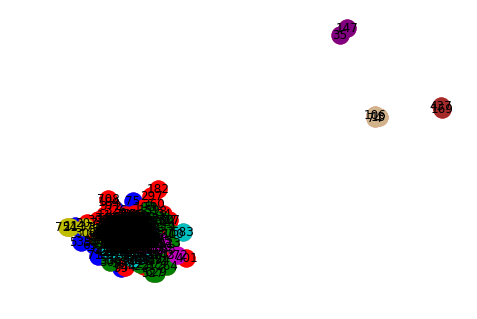

In [144]:
nx.draw(G, pos, edge_color='k',  with_labels=True,font_weight='light', node_size= 280, width= 0.9)
nx.draw_networkx_nodes(G, pos, nodelist=community1, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=community2, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=community3, node_color='g')
nx.draw_networkx_nodes(G, pos, nodelist=community4, node_color='c')
nx.draw_networkx_nodes(G, pos, nodelist=community5, node_color='m')
nx.draw_networkx_nodes(G, pos, nodelist=community6, node_color='y')
nx.draw_networkx_nodes(G, pos, nodelist=community7, node_color='tan')
nx.draw_networkx_nodes(G, pos, nodelist=community8, node_color='purple')
nx.draw_networkx_nodes(G, pos, nodelist=community9, node_color='brown')
plt.show()

In [149]:
sorted(G.degree(),key=lambda x:x[1],reverse=True)

[(709, 248),
 (90, 203),
 (223, 194),
 (664, 184),
 (257, 172),
 (278, 171),
 (623, 160),
 (687, 160),
 (638, 157),
 (626, 156),
 (85, 156),
 (330, 153),
 (735, 152),
 (532, 150),
 (377, 144),
 (355, 144),
 (116, 143),
 (373, 142),
 (670, 141),
 (424, 138),
 (563, 138),
 (78, 137),
 (631, 136),
 (481, 135),
 (265, 132),
 (420, 132),
 (152, 132),
 (151, 126),
 (1, 124),
 (64, 124),
 (615, 121),
 (453, 121),
 (279, 120),
 (630, 120),
 (487, 119),
 (514, 119),
 (132, 117),
 (188, 117),
 (484, 115),
 (592, 115),
 (145, 114),
 (275, 113),
 (463, 110),
 (210, 109),
 (679, 109),
 (339, 108),
 (767, 108),
 (570, 108),
 (252, 107),
 (255, 106),
 (455, 105),
 (625, 105),
 (415, 104),
 (502, 104),
 (308, 104),
 (590, 104),
 (589, 103),
 (494, 103),
 (498, 102),
 (654, 102),
 (16, 102),
 (400, 102),
 (69, 100),
 (444, 100),
 (516, 100),
 (691, 100),
 (375, 99),
 (715, 99),
 (361, 98),
 (251, 98),
 (477, 97),
 (538, 97),
 (31, 96),
 (559, 96),
 (142, 95),
 (158, 95),
 (716, 95),
 (694, 94),
 (730, 

In [159]:
harmonic=nx.harmonic_centrality(G)

In [160]:
harmonic=sorted((key, value) for (key, value) in harmonic.items())

In [162]:
sorted(harmonic,key=lambda x:x[1],reverse=True)

[(709, 496.2499999999991),
 (90, 472.74999999999903),
 (223, 465.7499999999987),
 (664, 458.8333333333319),
 (278, 455.83333333333223),
 (257, 453.58333333333195),
 (687, 451.41666666666566),
 (623, 448.7499999999988),
 (638, 447.4166666666655),
 (626, 447.08333333333206),
 (735, 446.2499999999989),
 (85, 445.24999999999864),
 (330, 444.7499999999987),
 (355, 442.16666666666555),
 (377, 441.3333333333322),
 (116, 440.49999999999875),
 (373, 439.49999999999875),
 (532, 438.2499999999982),
 (670, 436.1666666666652),
 (420, 435.91666666666555),
 (78, 435.41666666666515),
 (152, 434.2499999999987),
 (265, 433.0833333333319),
 (481, 432.66666666666515),
 (151, 432.5833333333322),
 (424, 432.0833333333315),
 (64, 430.4999999999987),
 (563, 430.4999999999981),
 (631, 430.1666666666647),
 (453, 429.33333333333206),
 (630, 428.4999999999987),
 (1, 428.16666666666515),
 (279, 426.91666666666526),
 (615, 426.24999999999847),
 (514, 424.91666666666504),
 (487, 424.58333333333167),
 (484, 424.24999

In [163]:
eigen=nx.eigenvector_centrality(G)
eigen=sorted((key, value) for (key, value) in eigen.items())
sorted(eigen,key=lambda x:x[1],reverse=True)

[(709, 0.1319905657089182),
 (90, 0.11605246754163963),
 (623, 0.11404715685890918),
 (257, 0.11160918812752524),
 (664, 0.10721973072639682),
 (223, 0.10088362082166018),
 (687, 0.09735435212681817),
 (377, 0.09573348883969382),
 (563, 0.09269926373375305),
 (481, 0.0912166208681792),
 (85, 0.09055847447648412),
 (631, 0.09048976036322433),
 (330, 0.09018707909080277),
 (638, 0.09008802856024457),
 (1, 0.09007970400916195),
 (626, 0.08964485170169818),
 (532, 0.08964427968886382),
 (278, 0.0892855191727423),
 (152, 0.08896709414141021),
 (424, 0.08781861162341378),
 (487, 0.08504690307078053),
 (735, 0.08498445134497332),
 (64, 0.08385643756887189),
 (145, 0.08336984570774232),
 (373, 0.08317221610481453),
 (279, 0.08102729543545183),
 (453, 0.07922733256231587),
 (116, 0.07916922114788526),
 (151, 0.07872711260175588),
 (615, 0.07778650352178698),
 (78, 0.0774577094157621),
 (670, 0.076378432084237),
 (630, 0.0753816804147198),
 (355, 0.07498976551953532),
 (420, 0.07481644760846334)

In [164]:
betweenness=nx.betweenness_centrality(G)
betweenness=sorted((key, value) for (key, value) in betweenness.items())
sorted(betweenness,key=lambda x:x[1],reverse=True)

[(709, 0.047078831164634946),
 (223, 0.04257937943016092),
 (278, 0.030392410234729644),
 (90, 0.028808745675464504),
 (355, 0.021883909607909226),
 (735, 0.02144826273654921),
 (638, 0.01834683207048565),
 (664, 0.018294598975517554),
 (265, 0.017671353768869653),
 (85, 0.014274830088887672),
 (687, 0.014041010436282196),
 (626, 0.013848831931501387),
 (116, 0.013831646733057663),
 (429, 0.01342162531072778),
 (330, 0.013409594663870535),
 (373, 0.012703565804059697),
 (670, 0.012690170229981474),
 (257, 0.012622082685107667),
 (252, 0.012489671481642513),
 (453, 0.01115141129222882),
 (151, 0.010586872394169172),
 (78, 0.01036154611439701),
 (18, 0.010217507321716281),
 (420, 0.00997125784054448),
 (625, 0.009829632606502357),
 (623, 0.009631518504269026),
 (522, 0.009570008567689775),
 (532, 0.009284144138715325),
 (158, 0.008860606824925319),
 (275, 0.008718378559199252),
 (444, 0.008545307781405026),
 (514, 0.008451580901095533),
 (400, 0.008351541110546722),
 (80, 0.0080449723678

In [148]:
df_patient=pd.read_csv("PatientInfo.csv")
df_case=pd.read_csv("Case.csv")
df_policy=pd.read_csv("Policy.csv")

In [151]:
df_policy.groupby(['gov_policy']).size()

gov_policy
Close bars and clubs                              1
Close karaoke                                     1
Drive-Through Screening Center                    2
Electronic Wristbands                             1
Emergency Use Authorization of Diagnostic Kit     5
Extends Tightened Quarantine Measures             1
Infectious Disease Alert Level                    4
KI-Pass: Korea Internet - Pass                    1
Logistics center                                  1
Mandatory 14-day Self-Quarantine                  1
Mandatory Self-Quarantine & Diagonostic Tests     1
Mask Distribution                                 2
Open API                                          1
Open Data                                         1
School Closure                                    1
School Opening Delay                              4
School Opening with Online Class                 10
Self-Diagnosis App                                1
Self-Quarantine Safety Protection App             1
S

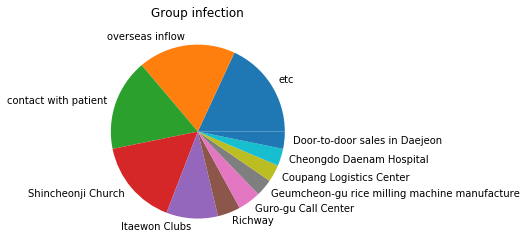

In [130]:
plt.pie(case_counts[case_counts > 2].tolist(),labels=case_list)
plt.title('Group infection')
plt.show()

In [124]:
case_counts = df_case['infection_case'].value_counts()
case_list = case_counts[case_counts > 2].index.tolist()

In [137]:
case_group=df_case.groupby(['infection_case'], as_index=False)['confirmed'].sum()

In [144]:
case_group=case_group.sort_values(by=['confirmed'],ascending=False)

In [147]:
case_group.head(10)

,infection_case,confirmed
62,Shincheonji Church,5213
76,contact with patient,1403
77,etc,1192
80,overseas inflow,949
34,Itaewon Clubs,271
56,Second Mi-Ju Hospital,196
50,Richway,184
26,Guro-gu Call Center,167
6,Coupang Logistics Center,134
33,Hansarang Convalescent Hospital,124


In [152]:
import pandas as pd
df=pd.read_csv('us_covid19_daily.csv',parse_dates=['date'])

In [153]:
population=331000000

In [154]:
df=df[['date', 'states','positive','negative','hospitalizedCurrently','hospitalizedCumulative','recovered','death','totalTestResults','deathIncrease','positiveIncrease']
  ]

In [155]:
df

,date,states,positive,negative,hospitalizedCurrently,hospitalizedCumulative,recovered,death,totalTestResults,deathIncrease,positiveIncrease
0,2020-09-27,56,7080459,90648092,29432.0,404083.0,2766280.0,196869.0,101298794,307,35289
1,2020-09-26,56,7045170,89982483,29554.0,403325.0,2750459.0,196562.0,100492536,866,47733
2,2020-09-25,56,6997437,89096343,29769.0,402171.0,2727335.0,195696.0,99488275,844,55526
3,2020-09-24,56,6941911,88239824,30043.0,400840.0,2710183.0,194852.0,98476600,921,43772
4,2020-09-23,56,6898139,87416375,29905.0,399252.0,2672338.0,193931.0,97536247,1157,38567
5,2020-09-22,56,6859572,86615497,29459.0,397801.0,2646959.0,192774.0,96612543,854,49439
6,2020-09-21,56,6810133,85942856,28755.0,396355.0,2615974.0,191920.0,95842590,287,39472
7,2020-09-20,56,6770661,85303584,28608.0,395215.0,2589239.0,191633.0,95117279,327,36295
8,2020-09-19,56,6734366,84512983,29035.0,394699.0,2577467.0,191306.0,94211956,740,45539
9,2020-09-18,56,6688827,83566093,29501.0,393632.0,2557862.0,190566.0,93145887,901,47486


In [278]:
df=df.dropna()

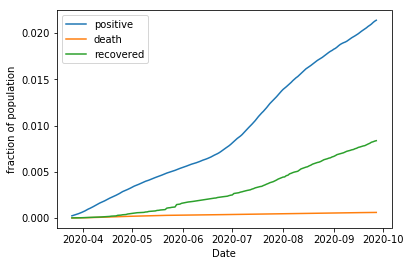

In [279]:
plt.plot(df['date'],df['positive']/population,label='positive')
plt.plot(df['date'],df['death']/population,label='death')
plt.plot(df['date'],df['recovered']/population,label='recovered')
plt.xlabel('Date')
plt.ylabel('fraction of population')
plt.legend()
plt.show()

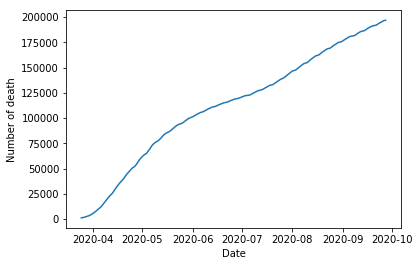

In [184]:
plt.plot(df['date'],df['death'])
plt.xlabel('Date')
plt.ylabel('Number of death')
plt.show()

Text(0.5, 0, 'Time')

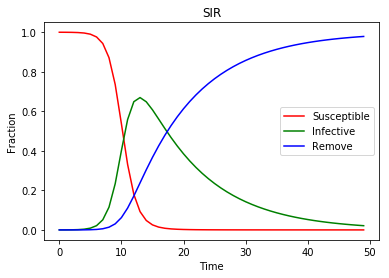

In [346]:
b=1#fixed number of contacts per day 
k=0.1#fixed fraction k of the infected group will recover during any given day
def SIR_differential(I,t):
    dsdt=-b*I[0]*I[1]
    didt=b*I[0] * I[1] - k * I[1]
    drdt=k*I[1]
    return [dsdt,didt,drdt]
 
SIR=odeint(SIR_differential,(0.9999,0.0001,0.0),np.arange(0.0,50,1) )
 
plt.plot(SIR[:,0], '-r', label='Susceptible')
plt.plot(SIR[:,1], '-g', label='Infective')
plt.plot(SIR[:,2], '-b', label='Remove')
plt.legend()
plt.title('SIR')
plt.xlabel('Time')
plt.ylabel('Fraction')
plt.xlabel('Time')


Text(0.5, 0, 'Time')

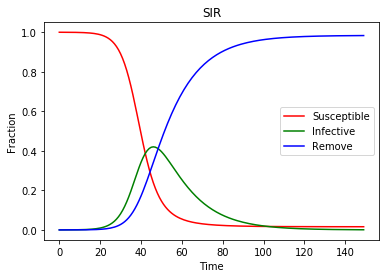

In [396]:
b=0.3
k=1/14
def SIR_differential(I,t):
    dsdt=-b*I[0]*I[1]
    didt=b*I[0] * I[1] - k * I[1]
    drdt=k*I[1]
    return [dsdt,didt,drdt]
 
SIR=odeint(SIR_differential,(0.9999,0.0001,0.0),np.arange(0.0,150,1) )
 
plt.plot(SIR[:,0], '-r', label='Susceptible')
plt.plot(SIR[:,1], '-g', label='Infective')
plt.plot(SIR[:,2], '-b', label='Remove')
plt.legend()
plt.title('SIR')
plt.xlabel('Time')
plt.ylabel('Fraction')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

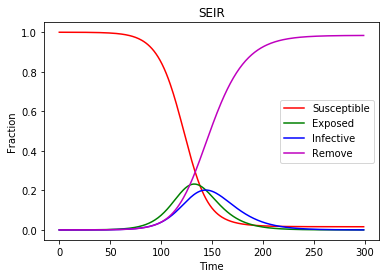

In [437]:
b=0.3
k=1/14
e=1/14

def SEIR_differential(I,t):
    dsdt=-(b * I[0] * I[2]) 
    dedt=(b * I[0] * I[2])  - I[1] *e
    didt=I[1]*e - k * I[2]
    drdt=k*I[2]
    return [dsdt,dedt,didt,drdt]

SEIR= odeint(SEIR_differential,(0.9999,0.0001,0,0),np.arange(0.0,300,1))


plt.plot(SEIR[:,0],color = 'r',label = 'Susceptible')
plt.plot(SEIR[:,1],color = 'g',label = 'Exposed')
plt.plot(SEIR[:,2],color = 'b',label = 'Infective')
plt.plot(SEIR[:,3],color = 'm',label = 'Remove')
plt.legend()
plt.title('SEIR')
plt.xlabel('Time')
plt.ylabel('Fraction')
plt.xlabel('Time')

In [294]:
def SEIR_differential(I,t,b,k,e):
    dsdt=-(b * I[0] * I[2]) 
    dedt=(b * I[0] * I[2])  - I[1] *e
    didt=I[1]*e - k * I[2]
    drdt=k*I[2]
    return [dsdt,dedt,didt,drdt]
def find_odeint(t,b,k,e):
    return odeint(SEIR_differential,(0.9999,0.0001,0,0),t,args=(b, k, e))[:,2]

In [383]:
positive=pd.read_csv("positive_us.csv")
recovered=pd.read_csv("recovered.csv")
death=pd.read_csv("death_us.csv")

In [384]:
def clean_df(df,att):
    df=pd.DataFrame(df.sum(axis=0), columns=['cumulative {}'.format(att)])
    df=df.T
    df=df.drop(columns=['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key'])
    return df

In [385]:
positive_cleaned=clean_df(positive,'positive')
death_cleaned=clean_df(death,'death')
death_cleaned=death_cleaned.drop(columns=['Population'])

In [386]:
recovered=recovered[recovered['Country/Region'] == 'US']
recovered_cleaned=recovered.drop(columns=['Province/State','Country/Region','Lat','Long'])

In [387]:
recovered_cleaned=recovered_cleaned.T
death_cleaned=death_cleaned.T
positive_cleaned=positive_cleaned.T

In [388]:
combine=pd.concat([recovered_cleaned, death_cleaned,positive_cleaned], axis=1, ignore_index=True)

In [389]:
combine.reset_index(level=0, inplace=True)

In [396]:
combine.columns = ['Date','Recovered', 'Death','Infected']

In [397]:
combine['Date']= pd.to_datetime(combine['Date'])

In [346]:
Confirmed = pd.read_csv(global_confirm_csv)
Death = pd.read_csv(global_death_csv) 
Recovered = pd.read_csv(global_recover_csv)
Confirmed_us = pd.read_csv(us_confirm_csv)
Death_us = pd.read_csv(us_death_csv)
us_state_location = pd.read_csv(us_state_loc_csv)

In [450]:
def SEIR_differential(I,t,p):
    dsdt=-(p[0] * I[0] * I[2]) 
    dedt=(p[0]* I[0] * I[2])  - I[1] *p[2]
    didt=I[1]*p[2] - p[1] * I[2]
    drdt=p[1]*I[2]
    return [dsdt,dedt,didt,drdt]
def find_odeint(t,p,Init):
    SEIR=lambda I,t:SEIR_differential(I,t,p)
    return odeint(func=SEIR,y0=Init,t=t)

In [478]:
infected_list=[]
recovered_list=[]
population=328*1e6
Init_S= 0.9999
Init_E = 0.00001
Init_I = 0
Init_R = 0
Init= (Init_S,Init_E,Init_I,Init_R)
time=range(0,len(combine))
for i in range(len(combine)):
    fraction_infected=combine['Infected'][i]/population
    fraction_recovered=combine['Recovered'][i]/population
    infected_list.append(fraction_infected)
    recovered_list.append(fraction_recovered)

In [477]:
def minimize(t,p,Init,infected_list,recovered_list):
    find=find_odeint(t,params_to_fit,initial_condition)
    fraction_infection_error=infected_list-find[:,2]
    fraction_recovered_error=recovered_list-find[:,3]
    return np.concatenate((fraction_infection_error,fraction_recovered_error))

In [480]:
Init=(0.9999,0.00001,0,0)
optimal=optimize.leastsq(minimize,x0=[0.01,0.001,0.01],args=(time,Init,infected_list,recovered_list),ftol=1e-10)
print(optimal)


[0.05026529 0.01321435 0.61463119]


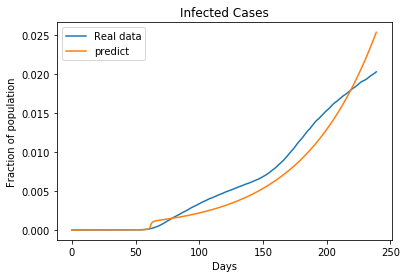

In [490]:
predict=find_odeint(time,(optimal[0],optimal[1],optimal[2]), Init)
plt.plot(time,infected_list)
plt.plot(time,predict[:,2])
plt.ylabel('Fraction of population')
plt.xlabel('Days')
plt.title('Infected Cases')
plt.legend(['Real data', 'predict'])

Text(0.5, 1.0, 'Recovered Cases')

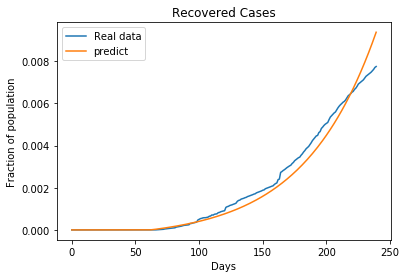

In [487]:
predict=find_odeint(time,(optimal[0],optimal[1],optimal[2]), Init)
plt.plot(time,infected_list)
plt.plot(time,predict[:,2])
plt.ylabel('Fraction of population')
plt.xlabel('Days')
plt.title('Infected Cases')
plt.legend(['Real data', 'predict'])

   
plt.plot(time, recovered_list)
plt.plot(time, predict[:,3])
plt.legend(['Real data', 'predict'])
plt.ylabel('Fraction of population')
plt.xlabel('Days')
plt.title('Recovered Cases')  